In [36]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D


In [37]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [38]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


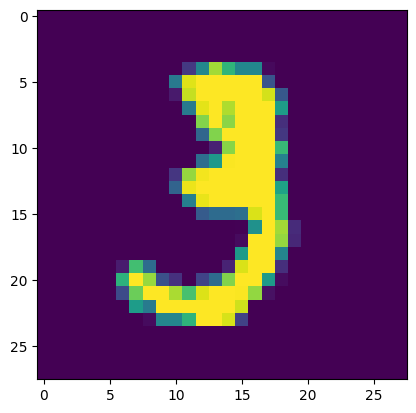

In [39]:
plt.imshow(X_train[10])

In [41]:
#Reshape the images
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape)

(60000, 28, 28, 1)


In [42]:
#Normalize the data 
X_train = X_train/255
X_test = X_test/255

In [43]:
#one-hot encoding
no_classes = 10
print('Shape before one-hot encoding: ',Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, no_classes)
Y_test = np_utils.to_categorical(Y_test, no_classes)
print("Shape after one-hot encoding :", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding : (60000, 10)


In [44]:
# Building the model
model = Sequential([
    Conv2D(28,kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu', input_shape = (28,28,1)),
    MaxPool2D(pool_size=(1,1)), 
    Flatten(),
    Dense(100, activation ='relu'),
    Dense(10, activation = 'softmax')
])

In [45]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [46]:
model.fit(X_train, Y_train, batch_size = 128, epochs =10, validation_data = (X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 55s 107ms/step - loss: 0.1927 - accuracy: 0.9428 - val_loss: 0.0891 - val_accuracy: 0.9720
Epoch 2/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0606 - accuracy: 0.9819 - val_loss: 0.0591 - val_accuracy: 0.9798
Epoch 3/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0538 - val_accuracy: 0.9818
Epoch 4/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0549 - val_accuracy: 0.9830
Epoch 5/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0612 - val_accuracy: 0.9820
Epoch 6/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0531 - val_accuracy: 0.9839
Epoch 7/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.0612 - val_accu

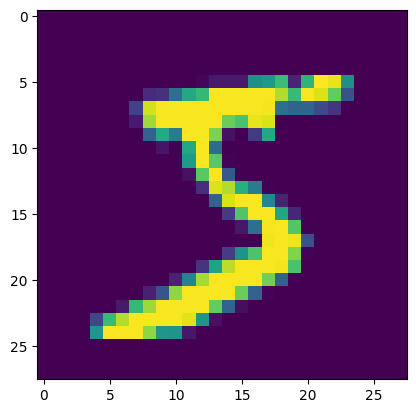

In [48]:
img = X_train[0]
plt.imshow(img)

In [60]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('loss : ',score[0])
print('accuracy : ', score[1])

# Therefore the accuracy 
print("Accuracy of the model developed : {} %".format(score[1]*100))

loss :  0.07552177459001541
accuracy :  0.9812999963760376
Accuracy of the model developed : 98.12999963760376 %
